In [154]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder

In [155]:
#Read the File 
data=pd.read_csv('DS/data_assignment.csv')

In [156]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [157]:
data.shape

(8523, 12)

In [158]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [160]:
#Check for duplicated rows
data.duplicated().sum()

0

In [161]:
#check for nan values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [162]:
data['Item_Weight'].mean()

12.857645184136183

In [163]:
data['Item_Weight'].median()

12.6

In [164]:
#fill nan with median of item weights
data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace=True)

In [165]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [166]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [167]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [168]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [169]:
data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [170]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [171]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

Item_Weight
Outliers =  Series([], Name: Item_Weight, dtype: float64)
Item_Visibility
Outliers =  49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 144, dtype: float64
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)
Outlet_Establishment_Year
Outliers =  Series([], Name: Outlet_Establishment_Year, dtype: int64)


<AxesSubplot:>

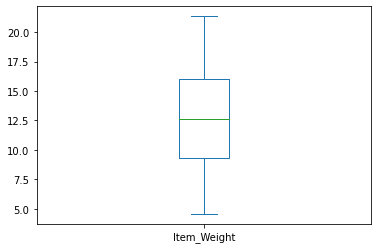

In [172]:
data['Item_Weight'].plot(kind = 'box')

<AxesSubplot:>

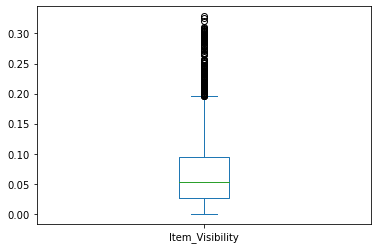

In [173]:
data['Item_Visibility'].plot(kind = 'box')

<AxesSubplot:>

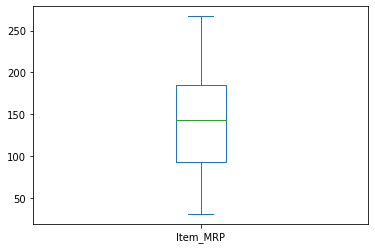

In [174]:
data['Item_MRP'].plot(kind = 'box')

In [175]:
data = data.drop(columns = 'Outlet_Establishment_Year')

In [176]:
data = data.drop(columns = 'Item_Identifier')

In [177]:
data = data.drop(columns = 'Outlet_Identifier')

In [178]:
data_numeric = data.select_dtypes(include = np.number)

In [179]:
data_numeric

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


In [180]:
data_category = data.select_dtypes(exclude = np.number)

In [181]:
data_category

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,Medium,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


In [182]:
scaling = StandardScaler()
data_scale_num = pd.DataFrame(scaling.fit_transform(data_numeric), columns = data_numeric.columns)

In [183]:
data_scale_num

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.831187,-0.970732,1.747454,0.910601
1,-1.630810,-0.908111,-1.489023,-1.018440
2,1.108727,-0.956917,0.010040,-0.049238
3,1.510904,-1.281758,0.660050,-0.849103
4,-0.918719,-1.281758,-1.399220,-0.695373
...,...,...,...,...
8518,-1.407246,-0.181193,1.180783,0.349915
8519,-1.048835,-0.371154,-0.527301,-0.956402
8520,-0.523639,-0.599784,-0.897208,-0.579100
8521,-1.325628,1.532880,-0.607977,-0.196725


In [184]:
data_category['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2},inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [185]:
data_category['Outlet_Location_Type'].replace({'Tier 1':0,'Tier 2':1,'Tier 3':2},inplace=True)

In [186]:
data_category['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1},inplace=True)

In [187]:
data_hot_encoded = pd.get_dummies(data_category.loc[:,["Item_Type","Outlet_Type"]])

In [188]:
Final_Data = pd.concat([data_scale_num, data_hot_encoded], axis = 1)

In [189]:
Final_Data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.831187,-0.970732,1.747454,0.910601,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.630810,-0.908111,-1.489023,-1.018440,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.108727,-0.956917,0.010040,-0.049238,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1.510904,-1.281758,0.660050,-0.849103,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.918719,-1.281758,-1.399220,-0.695373,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.407246,-0.181193,1.180783,0.349915,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8519,-1.048835,-0.371154,-0.527301,-0.956402,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8520,-0.523639,-0.599784,-0.897208,-0.579100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8521,-1.325628,1.532880,-0.607977,-0.196725,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
